# Exploratory data analysis

Notebook used to conduct analysis on full dataset which is used to substantiate findings in report

In [1]:
# Tables, Linalg and stats

import pandas as pd
import numpy as np
from scipy import stats

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Leave out warnings (deprecation warning)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in full dataset

textrank_data = pd.read_csv("TextRankOutput_clean/TextRankOutput_clean.csv",index_col="Unnamed: 0") 

In [3]:
textrank_data.head() # inspect dataset

,documents,num_comments,score,title,tldr,ups,upvote_ratio,LCS,COSINE,TFIDF
0,me and a friend decided to go to the beach las...,1,8,liking seafood,had delicious seafood. almost flooded a toilet...,8,0.76,me and a friend decided to go to the beach las...,me and a friend decided to go to the beach las...,me and a friend decided to go to the beach las...
1,obligatory this happened last thursday. i was ...,4,0,joking about being a whore,made a joke about being a whore in class. made...,0,0.50,we wound up getting on the topic of how i joki...,we wound up getting on the topic of how i joki...,"now, one of my best friend 's sister, we 'll c..."
2,this was actually a few years ago obligatory d...,24,25,burning my finger with molten starburst,i burned my finger with a microwaved starburst...,25,0.81,this was actually a few years ago obligatory d...,i put the rest in the fridge and ate it about ...,this was actually a few years ago obligatory d...
3,"this is my first post on reddit, so i m sorry ...",23,152,skipping my heart meds. nsfw,"a girl tried to give me a banana, smashed a di...",152,0.90,one of them sat on top of a desk right ahead o...,one of them sat on top of a desk right ahead o...,"i just started in a new school last week, and..."
4,unlike most tifu this actually just happened. ...,10,21,overcoming my fears,"noticed a spider above my bed,decided to overc...",21,0.84,apparently he enjoys the decembrists and starb...,either i knocked something into my ceiling or....,apparently he enjoys the decembrists and starb...


## Analysis relation between TLDR and post

In [4]:
textrank_data['document_length'] = textrank_data['documents'].str.count(' ') + 1 # Doc length
textrank_data['tldr_length'] = textrank_data['tldr'].str.count(' ') + 1 # TLDR length
textrank_data['tldr_doc_percentage'] = textrank_data['tldr_length'] / textrank_data['document_length'] # Relative pct

In [5]:
textrank_data.head() # Inspect new calculated columns

,documents,num_comments,score,title,tldr,ups,upvote_ratio,LCS,COSINE,TFIDF,document_length,tldr_length,tldr_doc_percentage
0,me and a friend decided to go to the beach las...,1,8,liking seafood,had delicious seafood. almost flooded a toilet...,8,0.76,me and a friend decided to go to the beach las...,me and a friend decided to go to the beach las...,me and a friend decided to go to the beach las...,483,26,0.053830
1,obligatory this happened last thursday. i was ...,4,0,joking about being a whore,made a joke about being a whore in class. made...,0,0.50,we wound up getting on the topic of how i joki...,we wound up getting on the topic of how i joki...,"now, one of my best friend 's sister, we 'll c...",195,19,0.097436
2,this was actually a few years ago obligatory d...,24,25,burning my finger with molten starburst,i burned my finger with a microwaved starburst...,25,0.81,this was actually a few years ago obligatory d...,i put the rest in the fridge and ate it about ...,this was actually a few years ago obligatory d...,205,23,0.112195
3,"this is my first post on reddit, so i m sorry ...",23,152,skipping my heart meds. nsfw,"a girl tried to give me a banana, smashed a di...",152,0.90,one of them sat on top of a desk right ahead o...,one of them sat on top of a desk right ahead o...,"i just started in a new school last week, and...",465,16,0.034409
4,unlike most tifu this actually just happened. ...,10,21,overcoming my fears,"noticed a spider above my bed,decided to overc...",21,0.84,apparently he enjoys the decembrists and starb...,either i knocked something into my ceiling or....,apparently he enjoys the decembrists and starb...,400,45,0.112500


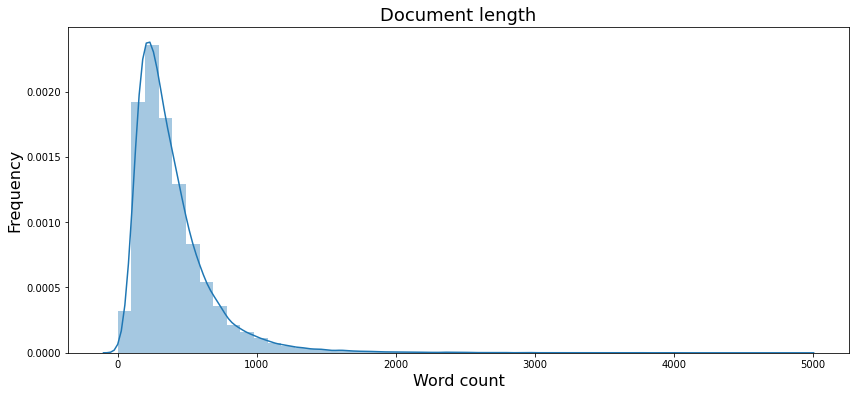

Average Document Length: 395.0984194038352


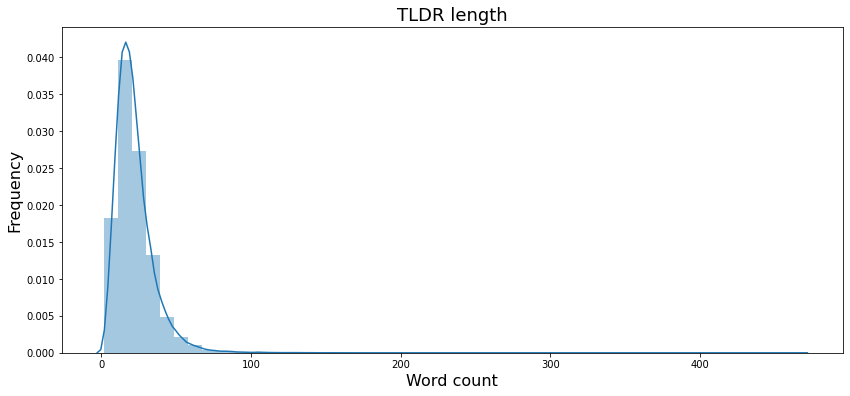

Average TLDR Length: 22.064552876400228


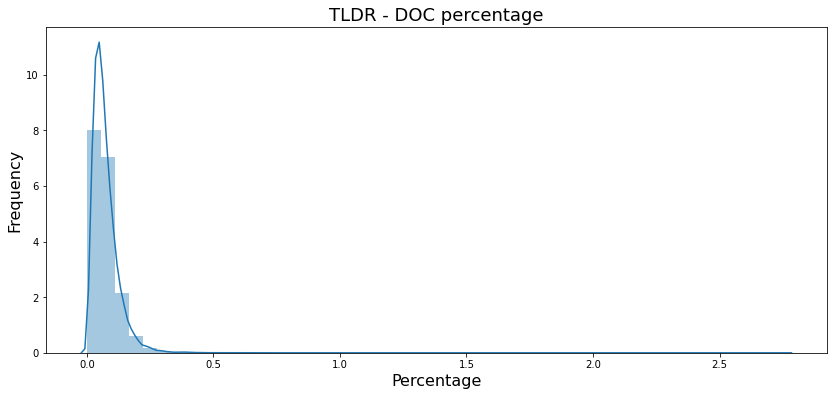

Average TLDR-DOC percentage: 0.08101337938613506


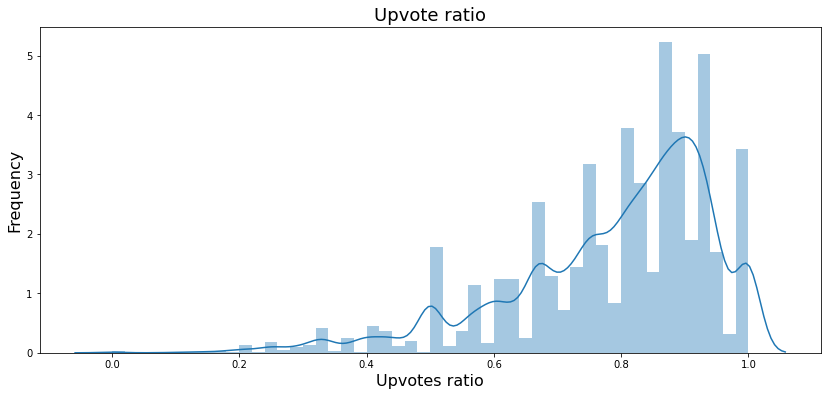

Average Upvotes: 323.5214068729827


In [33]:
# Plot the distribution plots and print the averages

# Dist plot
fig = plt.figure(figsize =[14,6])
sns.distplot(textrank_data['document_length'])
plt.title('Document length', fontsize=18)
plt.xlabel('Word count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

print("Average Document Length: " + str(textrank_data["document_length"].mean()))

# Dist plot
fig = plt.figure(figsize =[14,6])
sns.distplot(textrank_data['tldr_length'])
plt.title('TLDR length', fontsize=18)
plt.xlabel('Word count', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

print("Average TLDR Length: " + str(textrank_data["tldr_length"].mean()))

Outlier_filtered_tldrdoc = textrank_data['tldr_doc_percentage']
Outlier_filtered_tldrdoc = Outlier_filtered_tldrdoc[(np.abs(stats.zscore(Outlier_filtered_tldrdoc)) < 3)]

# Dist plot
fig = plt.figure(figsize =[14,6])
sns.distplot(Outlier_filtered_tldrdoc)
plt.title('TLDR - DOC percentage', fontsize=18)
plt.xlabel('Percentage', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

print("Average TLDR-DOC percentage: "+ str(textrank_data["tldr_doc_percentage"].mean()))

# Dist plot
fig = plt.figure(figsize =[14,6])
sns.distplot(textrank_data['upvote_ratio'])
plt.title('Upvote ratio', fontsize=18)
plt.xlabel('Upvotes ratio', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.show()

print("Average Upvotes: " + str(textrank_data["ups"].mean()))

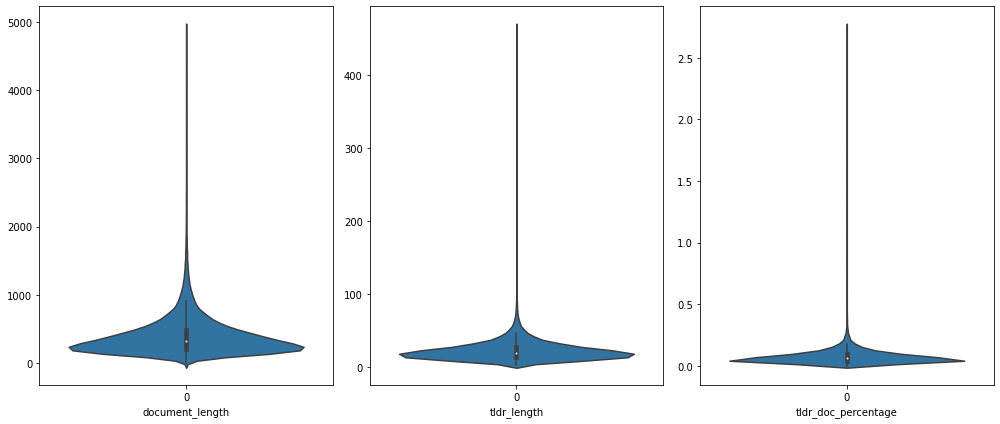

In [25]:
# Violin plots for distribution

fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 3)

ax = fig.add_subplot(gs[0, 0])
sns.violinplot(data=textrank_data['document_length'])
ax.set_xlabel("document_length")

ax = fig.add_subplot(gs[0, 1])
sns.violinplot(data=textrank_data['tldr_length'])
ax.set_xlabel("tldr_length")

ax = fig.add_subplot(gs[0, 2])
sns.violinplot(data=Outlier_filtered_tldrdoc)
ax.set_xlabel("tldr_doc_percentage")

fig.tight_layout()
plt.show()

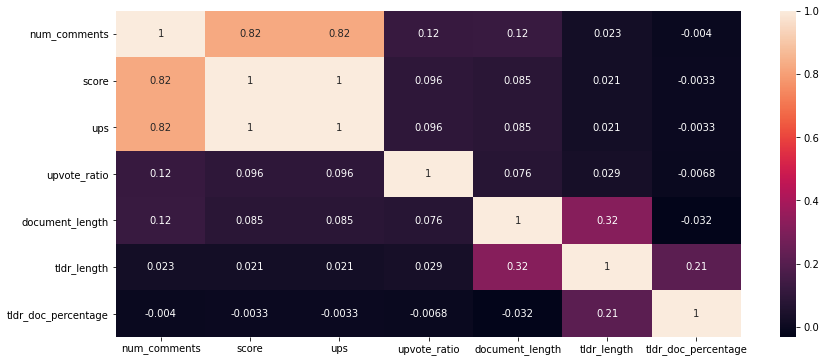

In [35]:
# Calculate and visualise correlation in matrix format

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] # Select all numeric columns

numerical_textrank = textrank_data.select_dtypes(include=numerics)

fig = plt.figure(figsize=(14, 6))

corrMatrix = numerical_textrank.corr() # Create matrix
sns.heatmap(corrMatrix, annot=True)
plt.show()